[link to paper (ICM_Vol_3_63)](http://www.icm2006.org/proceedings/Vol_III/contents/ICM_Vol_3_63.pdf)

[also see this](https://web.stanford.edu/~boyd/papers/pdf/icm06_talk.pdf)

See `utils/fast_averaging.py`

In [1]:
import numpy as np
import cvxpy as cp
import networkx as nx
import matplotlib.pyplot as plt

import os
import sys
module_path = os.path.abspath('..')
if module_path not in sys.path:
    sys.path.append(module_path)
    
from utils.fast_averaging import *

In [2]:
find_optimal_weights([(0, 1), (0, 2), (0, 3), (1, 4), (4, 2)])

(array([0.33333333, 0.33333333, 0.5       , 0.33333333, 0.33333333]),
 0.6666666665339431)

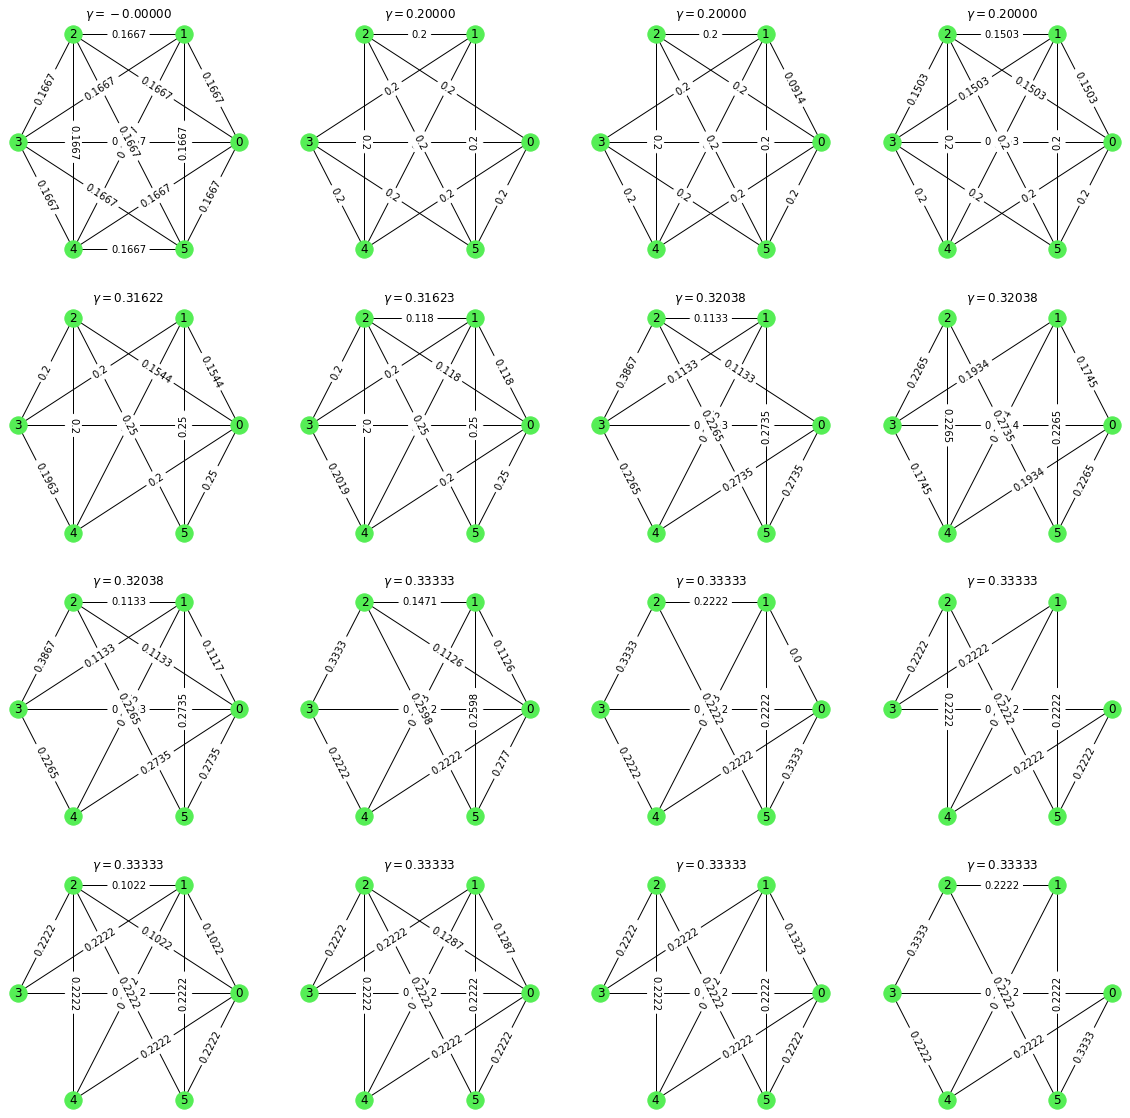

In [3]:
plt.rcParams["figure.figsize"] = [20., 20.]

from tqdm.notebook import tqdm

n = 6
cnt_graphs = 2**(n * (n - 1) // 2)
results = []
for mask in tqdm(range(1, cnt_graphs)):
    edges = []
    mask_iter = 0
    for u in range(n):
        for v in range(u + 1, n):
            if (mask & (1 << mask_iter)) != 0:
                edges.append((u, v))
            mask_iter += 1
    g = nx.Graph()
    g.add_nodes_from(range(n))
    g.add_edges_from(edges)
    if not nx.is_connected(g): 
        continue
    isomorphic = False
    for (_, g2, _) in reversed(results):
        if nx.could_be_isomorphic(g, g2):
            isomorphic = True
            break
    if isomorphic: 
        continue
    w, gamma = find_optimal_weights(edges)
    results.append((gamma, g, w))

results.sort(key=lambda x: x[0])

for graph_iter in range(min(16, len(results))):
    gamma, g, weights = results[graph_iter]
    for e, w in zip(g.edges, weights):
        g.edges[e]['weight'] = w
    plt.subplot(4, 4, graph_iter + 1)
    pos = nx.shell_layout(g)
    nx.draw(g, pos, with_labels=True, node_color='#55EE55')
    labels = nx.get_edge_attributes(g,'weight')
    for k, v in labels.items():
        labels[k] = float(f'{v:.4f}')
    nx.draw_networkx_edge_labels(g, pos, edge_labels=labels)
    plt.title(f'$\gamma={gamma:.5f}$')

In [124]:
print('Generating small-world graph...')
g = nx.connected_watts_strogatz_graph(25, 6, 0.7)
print('Finding optimial weights...')
%time weights, gamma = find_optimal_weights(g.edges)
for e, w in zip(g.edges, weights):
    g.edges[e]['weight'] = w
    g.edges[e]['color'] = '#FF0000' if w < 0 else '#000000'

Generating small-world graph...
Finding optimial weights...
CPU times: user 611 ms, sys: 12.1 ms, total: 623 ms
Wall time: 176 ms


Text(0.5, 1.0, '$\\gamma=0.58920$')

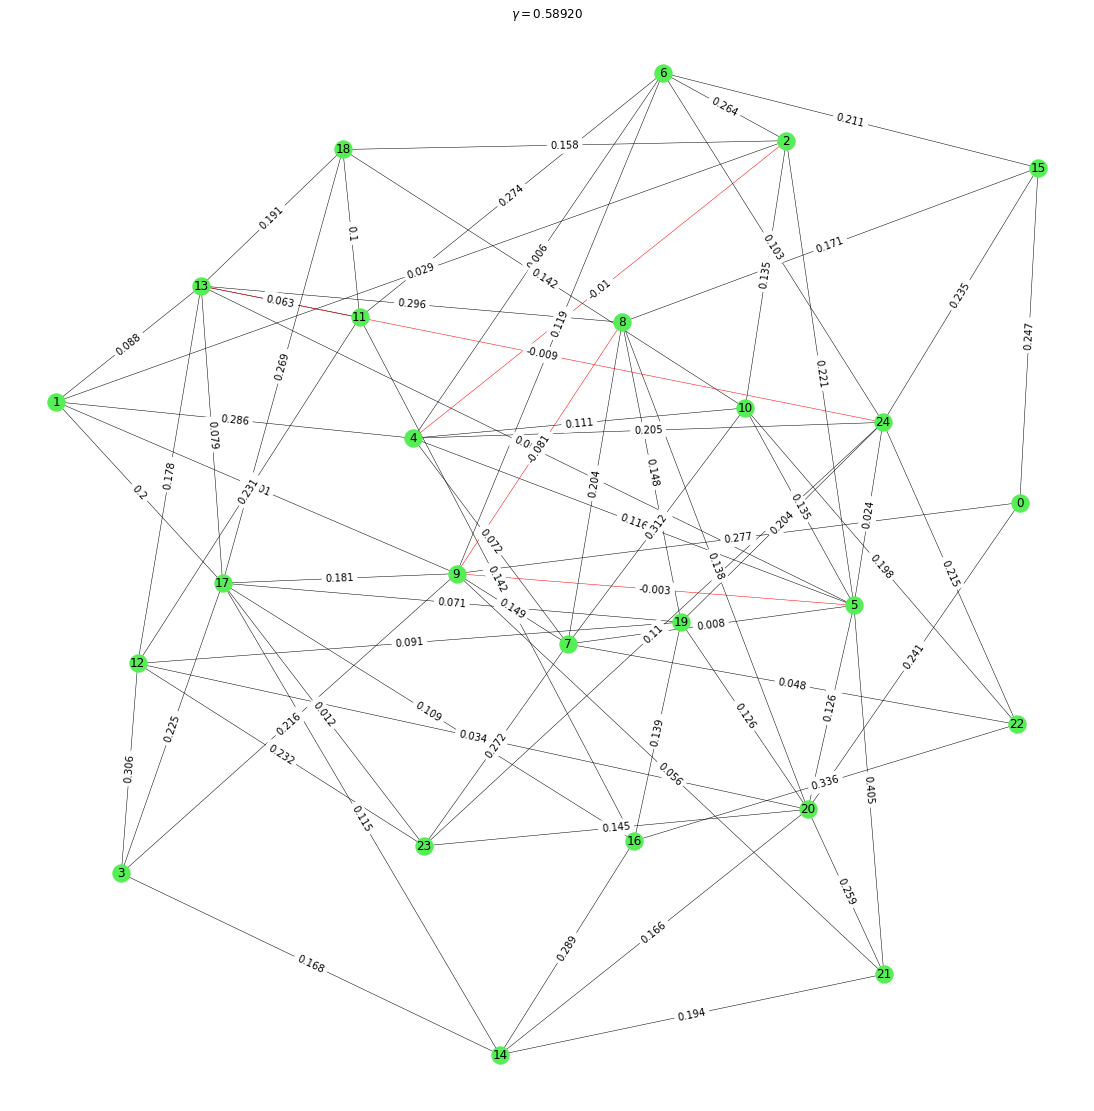

In [125]:
plt.rcParams["figure.figsize"] = [15., 15.]
pos = nx.spring_layout(g)
edge_colors = nx.get_edge_attributes(g, 'color').values()
nx.draw(g, pos, with_labels=True, node_color='#55EE55', edge_color=edge_colors, width=0.5)
labels = nx.get_edge_attributes(g, 'weight')
for k, v in labels.items():
    labels[k] = float(f'{v:.3f}')
nx.draw_networkx_edge_labels(g, pos, edge_labels=labels)
plt.title(f'$\gamma={gamma:.5f}$')

In [136]:
print('Generating graph...')
g = nx.hexagonal_lattice_graph(2, 2, periodic=True)
print('Finding optimial weights...')
%time weights, gamma = find_optimal_weights(g.edges)
for e, w in zip(g.edges, weights):
    g.edges[e]['weight'] = w
    g.edges[e]['color'] = '#FF0000' if w < 0 else '#000000'

Generating graph...
Finding optimial weights...
CPU times: user 15.6 ms, sys: 3.96 ms, total: 19.6 ms
Wall time: 17.8 ms


Text(0.5, 1.0, '$\\gamma=0.50000$')

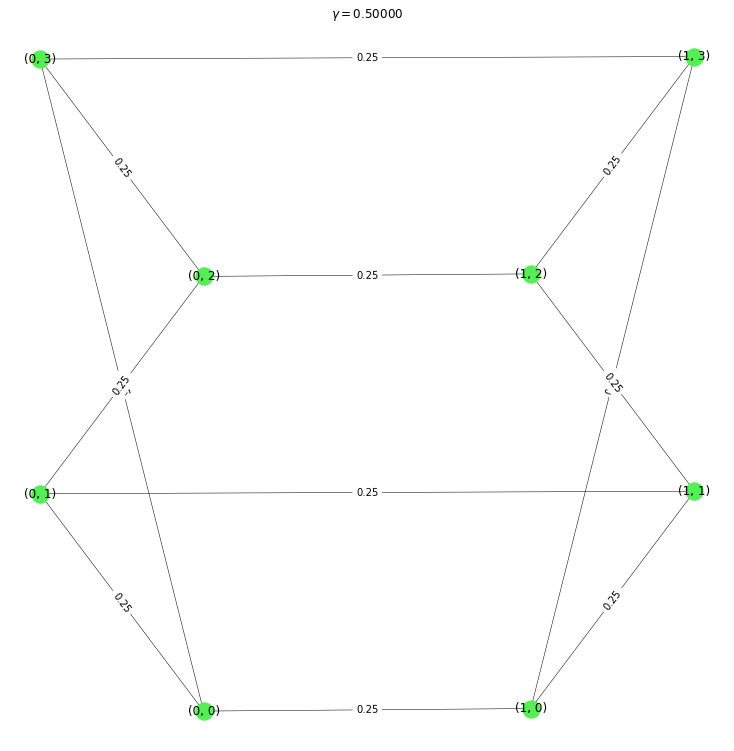

In [137]:
plt.rcParams["figure.figsize"] = [10., 10.]
pos = nx.get_node_attributes(g, 'pos')
# pos = nx.spring_layout(g)
edge_colors = nx.get_edge_attributes(g, 'color').values()
nx.draw(g, pos, with_labels=True, node_color='#55EE55', edge_color=edge_colors, width=0.5)
labels = nx.get_edge_attributes(g, 'weight')
for k, v in labels.items():
    labels[k] = float(f'{v:.3f}')
nx.draw_networkx_edge_labels(g, pos, edge_labels=labels)
plt.title(f'$\gamma={gamma:.5f}$')

In [150]:
print('Generating graph...')
g = nx.random_regular_graph(3, 12)
print('Finding optimial weights...')
%time weights, gamma = find_optimal_weights(g.edges)
for e, w in zip(g.edges, weights):
    g.edges[e]['weight'] = w
    g.edges[e]['color'] = '#FF0000' if w < 0 else '#000000'

Generating graph...
Finding optimial weights...
CPU times: user 79.6 ms, sys: 0 ns, total: 79.6 ms
Wall time: 32.1 ms


Text(0.5, 1.0, '$\\gamma=0.65784$')

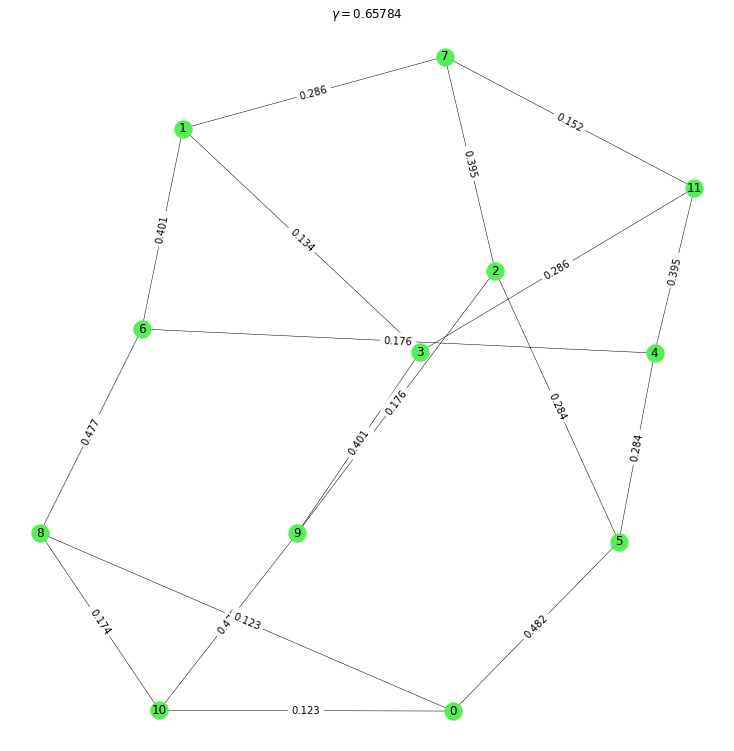

In [151]:
plt.rcParams["figure.figsize"] = [10., 10.]
# pos = nx.get_node_attributes(g, 'pos')
pos = nx.spring_layout(g)
edge_colors = nx.get_edge_attributes(g, 'color').values()
nx.draw(g, pos, with_labels=True, node_color='#55EE55', edge_color=edge_colors, width=0.5)
labels = nx.get_edge_attributes(g, 'weight')
for k, v in labels.items():
    labels[k] = float(f'{v:.3f}')
nx.draw_networkx_edge_labels(g, pos, edge_labels=labels)
plt.title(f'$\gamma={gamma:.5f}$')